# Урок 9. Линейная регрессия. Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

***
# Линейная регрессия

***
## Регрессионный анализ

Если **корреляционный анализ** помогает нам оценить тесноту связи, то **регрессионный анализ** может ответить на вопрос, как именно изменяется зависимая переменная $y$ при изменении независимой переменной $x$. Регрессионный анализ помогает нам подобрать математическую модель определенного типа, с помощью которой мы опишем изменение зависимой переменной $y$ при изменении независимой переменной $x$.

**Многомерный статистический анализ** – это раздел статистики, который посвящен исследованиям экспериментов с многомерными наблюдениями.

***
### Простая (парная) линейная регрессия

Если признак один, то такая линейная регрессия называется парной. Она описывает связь признака $x$ с результирующей $y$. В основе математической модели, описывающей эту зависимость, лежит предположение, что зависимость выражена следующим образом:\
$y = kx + b$ с той лишь разницей, что теперь нужно добавить случайную ошибку $\epsilon$:
$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
$y_i$ — зависимая переменная (отклик) \
$x_i$ — известная константа (значение объясняющей переменной, измерянной в i-ом эксперименте) \
$\beta_0, \beta_1$ — параметры модели (свободный член и угловой коэффициент) \
$\epsilon_i$ — случайная ошибка

<img src="./img/image1.png" alt="image1" width="600"/>

***
### Множественная линейная регрессия

Для простоты примем, что $x_0=1$. Тогда в общем случае форма линейной регрессии выглядит так:
$$\forall{h} \in H, h(\vec{x}) = w_0x_0 + w_1x_1 + \ldots + w_mx_m = \sum_{i=0}^{m}{w_i x_i} = \vec{x}^T \vec{w}$$

$x_i$ - **факторы** \
пространство с координатами $x_i$ - **факторное пространство** \
геометрическое изображение функции отклика в факторном пространстве - **поверхность отклика**

***
## Обучение линейной регрессии

***
### Метод наименьших квадратов

$\hat{y} = \beta_0 + \beta_1 x_i$

$\beta_0 = m_y - r \cfrac{\sigma_y}{\sigma_x} m_x$, \
$\beta_1 = r \cfrac{\sigma_y}{\sigma_x}$ – **коэффициент регрессии** $Y$ на $X$

In [2]:
X = np.array([27, 37, 42, 48, 57, 56, 77, 80])
Y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

In [3]:
Mx, My, SDx, SDy = X.mean(), Y.mean(), X.std(), Y.std()
r = np.corrcoef(X,Y)[0,1]

b1 = r * SDy / SDx
b0 = My - b1 * Mx
b0, b1

(0.17147009966777427, 0.03874584717607973)

In [4]:
Y_pred = b0 + b1 * X
Y_pred

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

***
#### Функция потерь

в основе метода линейной регрессии лежит метод наименьших квадратов. Т.е. коэффициенты подбираются таким образом, чтобы минимизировать среднюю квадратичную ошибку, которая находится по формуле: \
$mse = \cfrac{\sum{(y-\hat{y})^2}}{n}$

$\sigma_y^2(1-r^2)$ – **остаточная дисперсия** случайной величины $Y$ относительно случайной величины $X$ \
(характеризует величину ошибки, которую допускают при замене $Y$ линейной функцией $g(X) = \alpha X + \beta$).

In [5]:
mse = ((Y - Y_pred)**2).sum() / Y.shape[0]
mse

0.020001557308970075

In [6]:
mse = Y.var() * (1 - r**2)
mse

0.020001557308970054

***
### Матричный метод расчета коэффициентов линейной регрессии

Чтобы решить матричным методом уравнение вида $\hat{y} = \beta_0 + \beta_1 x_i$, нам нужно представить это уравнение в матричном виде.\
Матрица $X$ равна произведению матрицы $Y$ и матрицы $B$: \
$Y = X \cdot B$

$\begin{pmatrix} y_1 \\ y_2 \\ \ldots \\ y_n \\ \end{pmatrix}$ = 
$\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \ldots \\ 1 & x_n \\ \end{pmatrix}$
$\begin{pmatrix} \beta_0 \\ \beta_1 \\ \end{pmatrix}$

$B = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$

Матричный метод мы также можем использовать и при многомерном анализе. Тогда у нас будет больше столбцов (признаков) в матрице $X$ и, соответственно, матрица $B$ даст больше коэффициентов.

Если по какой-то причине мы хотим построить модель без интерсепта, тогда просто не добавляем столбец единиц.

In [7]:
X = X.reshape(-1,1)
X

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [8]:
x = np.hstack([np.ones((X.shape[0],1)),X])
x

array([[ 1., 27.],
       [ 1., 37.],
       [ 1., 42.],
       [ 1., 48.],
       [ 1., 57.],
       [ 1., 56.],
       [ 1., 77.],
       [ 1., 80.]])

In [9]:
Y = Y.reshape(-1,1)
Y

array([[1.2],
       [1.6],
       [1.8],
       [1.8],
       [2.5],
       [2.6],
       [3. ],
       [3.3]])

In [10]:
B = np.linalg.inv(x.T @ x) @ (x.T @ Y)
B

array([[0.1714701 ],
       [0.03874585]])

***
### Расчет коэффициентов методом градиентного спуска

**Градиентный спуск** – итеративный метод машинного обучения.

Оптимальная прямая $y = a + bx$, которая проходит максимально близко к эмпирическим точкам.

Для начала напишем функцию mse, чтобы потом сравнить расчеты mse через функцию с вычислениями mse с помощью метода градиентного спуска. Коэффициенты подбираются так, чтобы минимизировать эту ошибку. В этом методе мы работаем с производной mse, причем производную берем по коэффициенту, который ищем, а все остальные переменные рассматриваем как константы.

Подберем параметры $a$ и $b$ так, чтобы сумма квадратов отклонений была минимальной. Так как каждое отклонение зависит от отыскиваемых параметров, то и сумма квадратов отклонений есть функция $F$ этих параметров:\
$\displaystyle F(a,b) = \sum_{i=1}^{n}{(Y_i-y_i)^2} = \sum_{i=1}^{n}{(a + b x_i -y_i)^2}$

Для отыскания минимума нужны частные производные: \
$\displaystyle \cfrac{\partial{F}}{\partial{a}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)x_i}$ \
$\displaystyle \cfrac{\partial{F}}{\partial{b}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)}$

Нам понадобится установить скорость обучения. Нет четких правил по выбору этого параметра. Если мы возьмем слишком большой, то не сможем посчитать коэффициент, проскакивая через минимум, а если слишком маленький, то вычисления могут занять очень много времени. Также надо определиться со стартовыми значениями коэффициентов.

In [15]:
# функция потерь
def mse(a, b, x, y):
    return np.sum((a + b*x - y)**2)

# частная производная функции потерь по a
def mse_pa(a, b, x, y):
    return 2 * np.sum((a + b*x) - y)

# частная производная функции потерь по b
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b*x) - y)*x)

In [16]:
X = np.array([27, 37, 42, 48, 57, 56, 77, 80])
Y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

In [18]:
alpha = 1e-6
a = 0
b = 0
mse_min = mse(a,b,X,Y)

for i in range(6*10**6):
    a -= alpha * mse_pa(a,b,X,Y)
    b -= alpha * mse_pb(a,b,X,Y)
    if not i%(5*10**5):
        print(f'{i}: {a = } {b = } mse = {mse(a, b, X, Y)}')
    if mse(a,b,X,Y) > mse_min:
        print(f'Достигнут минимум {i_min}: a = {a_min} b = {b_min} mse = {mse_min}')
        break
    else:
        mse_min = mse(a,b,X,Y)
        i_min, a_min, b_min = i, a, b

0: a = 3.559999999999999e-05 b = 0.0020733698112000002 mse = 39.186825972008364
500000: a = 0.09272665489826806 b = 0.04008781693748086 mse = 0.1648133834198471
1000000: a = 0.13515870725239235 b = 0.0393646769816394 mse = 0.16103335541375358
1500000: a = 0.1547256300423607 b = 0.03903121152575708 mse = 0.16022954800709793
2000000: a = 0.16374863143463644 b = 0.03887743878872534 mse = 0.16005862166846999
2500000: a = 0.1679094570789536 b = 0.038806528731215394 mse = 0.16002227488565232
3000000: a = 0.1698281612096286 b = 0.03877382959121742 mse = 0.160014545891796
3500000: a = 0.17071294366767417 b = 0.03875875085917071 mse = 0.1600129023530447
4000000: a = 0.17112094820862336 b = 0.03875179752155549 mse = 0.16001255286128993
4500000: a = 0.17130909355885407 b = 0.038748591091210746 mse = 0.16001247854330614
5000000: a = 0.1713958540461965 b = 0.038747112492568805 mse = 0.1600124627398923
5500000: a = 0.17143586238099764 b = 0.03874643065834549 mse = 0.16001245937936143
Достигнут миним

***
### Python для построения линейной регрессии (Sklearn)

In [19]:
X = np.array([27, 37, 42, 48, 57, 56, 77, 80])
Y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

In [20]:
x = X.reshape(-1,1)
x

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [21]:
# задаем модель
model = LinearRegression()

# подбор коэффициентов
regres = model.fit(x,Y)

# коэффициент (alpha) и интерсепт (beta)
regres.coef_, regres.intercept_

(array([0.03874585]), 0.17147009966777427)

In [22]:
Y_pred = model.predict(x)
Y_pred

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

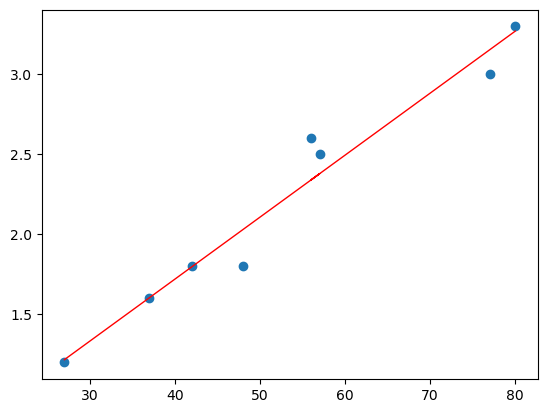

In [23]:
plt.scatter(x,Y)
plt.plot(x, Y_pred, color='red', linewidth=1);

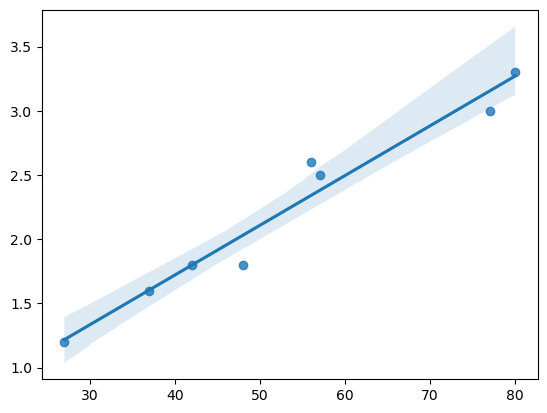

In [24]:
sns.regplot(x=X, y=Y);

После того как построили модель линейной регрессии мы должны оценить полученную модель. Нам понадобятся такие параметры как **коэффициент детерминации, критерий Фишера и критерий Стьюдента**.

***
## Оценка модели

***
### Коэффициент детерминации

Коэффициент детерминации показывает, какую долю изменчивости $Y$ описала подобранная математическая модель. Коэффициент детерминации равен квадрату коэффициента корреляции $R^2 = r^2$

In [25]:
R = np.corrcoef(X, Y)[1,0]**2
R

0.9576125937823151

In [26]:
regres.score(x,Y)

0.9576125937823151

***
### Оценка значимости математической модели (критерий Фишера)

Для оценки значимости математической модели используется критерий Фишера. Критерий Фишера имеет ассиметричное распределение с правым длинным хвостом. Как и в любом тестировании гипотезы, нам надо сравнить табличное значение коэффициента с расчетным. 

Для определения статистической значимости рассчитанного значения F-критерия Фишера его сравнивают с критическим или табличным значением. При этом табличное значение определяется на основе числа наблюдений, степеней свободы и заданного уровня значимости следующим образом: \
$F_к(\alpha,k_1,k_2)$, где \
$k_1 = m$ – это количество факторов в построенной регрессионной модели (кол-во переменных) \
$k_2 = n-m-1$

In [27]:
X = np.array([27, 37, 42, 48, 57, 56, 77, 80])
Y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

In [28]:
alpha = 0.05
n, m = X.shape[0], 1
k1, k2 = m, n-m-1

# правосторонняя критическая область
Fk = stats.f.ppf(1-alpha, k1, k2)
Fk

5.987377607273699

В общем виде F-критерий Фишера рассчитывается по следующей формуле:\
$$F = \cfrac{S_{факт}^2}{S_{ост}^2}$$
где $S_{факт}^2$ - факторная дисперсия, $S_{ост}^2$ - остаточная дисперсия

$S_{факт}^2 = \cfrac{\sum{(\hat{y_x}-\bar{y})^2}}{m}$, 
$S_{ост}^2 = \cfrac{\sum{(y-\hat{y_x})^2}}{n-m-1}$, где
$n$ - число наблюдений, $m$ - число параметров при переменной $x$ (кол-во факторов в модели регрессии).

При этом необходимо обратить внимание на то, что в зависимости от типа исследуемой модели регрессии применяемая формула определения F-критерия Фишера может изменяться. Например, для расчета F-критерия Фишера для **парной линейной регрессии** может использоваться следующая формула: \
$F = \cfrac{S_{факт}^2}{S_{ост}^2} = \cfrac{\sum{(\hat{y_x}-\bar{y})^2}}{\sum{(y-\hat{y_x})^2}} \cdot (n-2)$

При использовании **коэффициента детерминации** расчет F-критерия Фишера для **парной линейной регрессии** может быть выполнен по такой формуле:\
$F = \cfrac{R^2}{1-R^2} \cdot (n-2)$

Для **парной нелинейной модели регрессии** расчет F-критерия Фишера может быть осуществлен через связь с **индексом детерминации** по следующей формуле: \
$F = \cfrac{\rho_{xy}^2}{1-\rho_{xy}^2} \cdot \cfrac{n-m-1}{m}$

Для уравнения множественной регрессии F-критерий Фишера рассчитывается по следующей формуле:\
$F = \cfrac{S_{факт}^2}{S_{ост}^2} = \cfrac{R^2}{1-R^2} \cdot \cfrac{n-m-1}{m}$

In [29]:
My = np.mean(Y)
Fn = np.sum((Y_pred - My)**2) / np.sum((Y - Y_pred)**2) * (n-2)
Fn

135.55147803067672

In [30]:
Fn = R / (1-R) * (n-2)
Fn

135.55147803067692

**Интерпретация F-критерия Фишера для уравнения регрессии в целом:** \
в том случае, когда фактическая величина F-критерия Фишера **больше** табличного показателя, то уравнение регрессии в целом является статистически значимым.

**Интерпретация частного F-критерия Фишера:** \
в том случае, когда рассчитанная величина частного $F_{x_i}$ **превышает** критическое значение, то дополнительное включение фактора $x_i$ в регрессионную модель статистически оправданно и коэффициент регрессии $\beta_i$ при соответствующем факторе $x_i$ статистически значим. \
Но если рассчитанная величина $F_{x_i}$ **меньше** табличного, то дополнительное включение в модель фактора $x_i$ не оправдано, т.к. данный фактор, как и коэффициент регрессии при нём является статистически незначимым.

***
### Оценка значимости отдельных коэффициентов (критерий Стьюдента)

Проверка статистической значимости параметров регрессионного уравнения (коэффициентов регрессии) выполняется по t-критерию Стьюдента, который рассчитывается по формуле:\
$t_a = \cfrac{|\beta_0|}{S_a}$, где \
$\beta_0$ - значение интерсепта \
$S_a$ - cтандартная ошибка параметра $\beta_0$: \
$S_a = \sqrt{\cfrac{S_{ост}^2 \cdot \sum{x^2}}{n \sum{(x-\bar{x})^2}}} = \cfrac{S_{ост} \cdot \sqrt{\sum{x^2}}}{\sigma_x \cdot n}$

$S_{ост}^2 = \cfrac{\sum{(y-\hat{y_x})^2}}{n-m-1} = \sigma_y^2(1-r^2)$

In [31]:
So = np.sqrt(np.sum((Y - Y_pred)**2) / (n-m-1))
SDx = np.std(X)
Sa = So * np.sqrt(np.sum(X**2)) / (SDx * n)
ta = b0 / Sa
ta

0.9239217125297741

$t_b = \cfrac{|\beta_1|}{S_b}$, где \
$\beta_1$ - значение параметра \
$S_b$ - стандартная ошибка коэффициента регрессии: \
$S_b = \sqrt{\cfrac{S_{ост}^2}{\sum{(x-\bar{x})^2}}} = \cfrac{S_{ост}}{\sigma_x \cdot \sqrt{n}}$, где 
$S_{ост}^2 = \cfrac{\sum{(y-\hat{y_x})^2}}{n-m-1}$

In [32]:
Sb = So / (SDx * np.sqrt(n))
tb = b1 / Sb
tb

11.642657687601947

Рассчитанное значение критерия Стьюдента сравнивают с его табличным значением при выбранной доверительной вероятности $\gamma$ и числе степеней свободы $n-m-1$, где $n$ - число точек, $m$-число переменных в регрессионном уравнении.

In [33]:
df = n - m - 1
Tk = stats.t.ppf(1-alpha/2, df)
Tk

2.4469118487916806

Если вычисленное значение $t_p$ выше, чем табличное, то коэффициент регрессии является значимым с данной доверительной вероятностью. В противном случае есть основания для исключения соответствующей переменной из регрессионной модели.

***
## Условия применимости линейной регрессии

Помимо предварительной оценки на наличие линейной зависимости, есть еще три условия применимости:
1) Наличие линейной зависимости между зависимой и независимой переменной

2) Независимость остатков

3) Для любого значения x значение зависимой переменной y распределено нормально

4) Гомоскедастичность

***
### 1. Наличие линейной зависимости между зависимой и независимой переменной

Наличие линейной зависимости можно увидеть с помощью графика.

<img src="./img/image2.png" alt="image2" width=""/>

На первом графике условие соблюдается, на втором, где видим параболу, нет. Решить эту проблему можем с помощью нелинейной трансформации $x$ и/или $y$. Здесь мы можем применить:
* логарифм
* квадратный корень
* умножение на обратное число


***
### 2. Независимость остатков

Проверить можем с помощью графика, на котором с течением времени мы не должны видеть каких-то паттернов в поведении остатков. Например, с течением времени остатки не должны расти. Они должны быть разбросаны случайным образом вокруг горизонтальной линии, как, например, на рисунке ниже.

<img src="./img/image3.png" alt="image3" width=""/>

А если мы видим расположение остатков, например, напоминающих параболу, то мы приходим к выводу, что для таких данных лучше подойдет нелинейная модель. Эта проблема тоже решаема с помощью трансформации данных.

***
### 3. Для любого значения $x$ значение зависимой переменной $y$ распределено нормально

Проверить данное утверждение можно после построение математической модели линейной регрессии.

Методы проверки:
* Тест Шапиро-Уилка
* QQ-plot

In [34]:
stats.shapiro(Y - Y_pred)

ShapiroResult(statistic=0.9600728154182434, pvalue=0.8107935786247253)

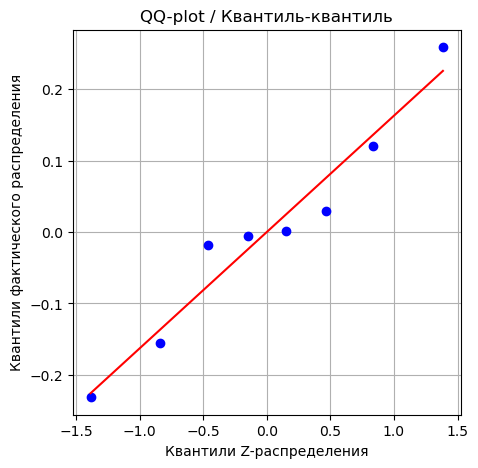

In [35]:
plt.figure(figsize = (5, 5))

stats.probplot(Y - Y_pred, dist="norm", plot=plt)

plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid();

***
### 4. Гомоскедастичность

**Под этим свойством понимается постоянство дисперсии при всех значениях $x$.**

Например, если расположение остатков напоминает конус, мы говорим, о гетороскедастичности.

<img src="./img/image4.png" alt="image4" width=""/>

***
## Трансформация данных

Чтобы обеспечить условия применимости линейной регрессии иногда нам необходимо сделать трансформацию данных. Но нельзя забывать, что получив модель, нам нужно сделать обратную трансформацию.

| Трансформация | Уравнение регрессии | Оценочное значение $\hat{y}$ |
| ----- |  ----- |  ----- |
| $\log{y}$ | $\log{y} = \alpha x + \beta$ | $\hat{y} = 10^{\alpha x + \beta}$ |
| $\cfrac{1}{y}$ | $\cfrac{1}{y} = \alpha x + \beta$ | $\hat{y} = \cfrac{1}{\alpha x + \beta}$ |
| $\sqrt{y}$ | $\sqrt{y} = \alpha x + \beta$ | $\hat{y} = (\alpha x + \beta)^2$ |
| $\log{x}$ | $y = \alpha \log{x} + \beta$ | $\hat{y} = \alpha \log{x} + \beta$ |
| $\log{\log{x}}$ и $\log{y}$ | $\log{y} = \alpha \log{x} + \beta$ | $\hat{y} = 10^{\alpha \log{x} + \beta}$ |

***
# Логистическая регрессия

Логистическая регрессия применяется, когда $y$ является бинарной переменной (0 или 1). Т.е. с помощью этого метода мы можем решить задачу бинарной классификации.